# Chapter 11: Independence, Covariance, and Correlation

## Introduction

In the previous chapter, we explored how to describe the probability distributions of multiple random variables simultaneously using joint distributions. We saw how to derive marginal and conditional distributions from the joint distribution. Now, we delve deeper into the relationships *between* random variables.

How can we quantify if knowing the value of one variable tells us something about the other? Are they completely unrelated (independent)? Or do they tend to move together or in opposite directions? This chapter introduces three fundamental concepts for describing these relationships:

1.  **Independence:** The strongest form of "unrelatedness," where the value of one variable provides no information about the value of the other.
2.  **Covariance:** A measure of the *direction* of the linear relationship between two variables.
3.  **Correlation:** A *standardized* measure of the *strength and direction* of the linear relationship between two variables.

We will also explore how these concepts affect the variance of sums of random variables, a crucial calculation in fields like finance (portfolio variance) and engineering (error propagation).

**Learning Objectives:**

* Understand the definition and implications of independence for random variables.
* Define, calculate, and interpret covariance.
* Define, calculate, interpret, and understand the properties of the correlation coefficient.
* Learn how to calculate the variance of sums of random variables, considering their covariance.
* Apply these concepts using Python (NumPy, Pandas, Matplotlib/Seaborn) for simulation, calculation, and visualization.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, uniform

# Set default plot style
plt.style.use('seaborn-v0_8-darkgrid')
# Set seed for reproducibility
np.random.seed(42)

## Independence of Random Variables

Recall from Chapter 5 that two events $A$ and $B$ are independent if $P(A \cap B) = P(A)P(B)$. We extend this concept to random variables.

**Definition:** Two random variables $X$ and $Y$ are **independent** if for *any* sets $A$ and $B$ (in the range of $X$ and $Y$, respectively), the events $\{X \in A\}$ and $\{Y \in B\}$ are independent. That is:

$$ P(X \in A, Y \in B) = P(X \in A) P(Y \in B) $$

This is equivalent to saying that their joint distribution function factors into the product of their marginal distribution functions:

* **Discrete:** $P(X=x, Y=y) = P(X=x) P(Y=y)$ for all possible values $x, y$. (Joint PMF = Product of Marginal PMFs)
* **Continuous:** $f_{X,Y}(x,y) = f_X(x) f_Y(y)$ for all $x, y$. (Joint PDF = Product of Marginal PDFs)

**Intuition:** If $X$ and $Y$ are independent, knowing the outcome of $X$ provides no information about the outcome of $Y$, and vice-versa.

**Example:**
* Let $X$ be the outcome of a fair coin flip (0 for Tails, 1 for Heads). $P(X=0)=0.5, P(X=1)=0.5$.
* Let $Y$ be the outcome of a fair six-sided die roll ({1, 2, 3, 4, 5, 6}). $P(Y=y)=1/6$ for $y \in \{1, ..., 6\}$.
Assuming the flip and the roll don't influence each other, $X$ and $Y$ are independent. The probability of getting Heads ($X=1$) and rolling a 4 ($Y=4$) is:
$P(X=1, Y=4) = P(X=1)P(Y=4) = (0.5) \times (1/6) = 1/12$.

**Non-Example:**
* Let $H$ be a person's height and $W$ be their weight. Intuitively, taller people tend to weigh more. Knowing someone is very tall ($H$ is large) makes it more likely their weight ($W$) is also large. Therefore, $H$ and $W$ are generally *not* independent. We wouldn't expect $f_{H,W}(h,w) = f_H(h) f_W(w)$.

### Checking for Independence

In practice, we often *assume* independence based on the physical nature of the processes generating the random variables (like separate coin flips). If we have the joint distribution, we can check if it factorizes into the product of the marginals. If we only have data, testing for independence rigorously is complex (involving statistical hypothesis tests beyond the scope of basic probability). However, we'll see soon that calculating the *correlation* can give us a clue (if correlation is non-zero, they are dependent; if correlation is zero, they *might* be independent).

## Covariance

If variables are not independent, they are dependent. Covariance is a measure that describes the *direction* of the linear relationship between two random variables.

**Definition:** The **covariance** between two random variables $X$ and $Y$, denoted $\mathrm{Cov}(X, Y)$ or $\sigma_{XY}$, is:

$$ \mathrm{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])] $$

This formula calculates the expected value of the product of the deviations of $X$ and $Y$ from their respective means.

A more convenient formula for calculation is often:

$$ \mathrm{Cov}(X, Y) = E[XY] - E[X]E[Y] $$

**Interpretation:**

* **$\mathrm{Cov}(X, Y) > 0$**: Indicates a *positive linear relationship*. When $X$ is above its mean, $Y$ tends to be above its mean, and vice-versa. (Example: Height and Weight).
* **$\mathrm{Cov}(X, Y) < 0$**: Indicates a *negative linear relationship*. When $X$ is above its mean, $Y$ tends to be below its mean, and vice-versa. (Example: Temperature and Heating Costs).
* **$\mathrm{Cov}(X, Y) = 0$**: Indicates *no linear relationship*. This is a necessary condition for independence, but not sufficient (more on this later).

**Properties:**

1.  $\mathrm{Cov}(X, X) = E[(X - E[X])^2] = \mathrm{Var}(X)$
2.  $\mathrm{Cov}(X, Y) = \mathrm{Cov}(Y, X)$ (Symmetric)
3.  $\mathrm{Cov}(aX + b, cY + d) = ac \mathrm{Cov}(X, Y)$ for constants $a, b, c, d$. (Scaling affects covariance)
4.  $\mathrm{Cov}(X+Y, Z) = \mathrm{Cov}(X, Z) + \mathrm{Cov}(Y, Z)$ (Distributive)
5.  If $X$ and $Y$ are independent, then $E[XY] = E[X]E[Y]$, which implies $\mathrm{Cov}(X, Y) = 0$.

**Important Note:** The value of covariance depends on the units of $X$ and $Y$. For example, $\mathrm{Cov}(\text{Height in cm}, \text{Weight in kg})$ will be much larger than $\mathrm{Cov}(\text{Height in m}, \text{Weight in kg})$, even though the underlying relationship is the same. This makes it hard to judge the *strength* of the relationship from covariance alone.

### Calculating Covariance with NumPy

NumPy's `np.cov()` function calculates the covariance matrix. For two 1D arrays `x` and `y`, `np.cov(x, y)` returns a 2x2 matrix:

$$
\begin{pmatrix}
\mathrm{Var}(X) & \mathrm{Cov}(X, Y) \\
\mathrm{Cov}(Y, X) & \mathrm{Var}(Y)
\end{pmatrix}
$$

We are usually interested in the off-diagonal elements, $\mathrm{Cov}(X, Y)$.

In [2]:
# Simulate two potentially related variables
n_samples = 1000
# X: Standard normal
x_samples = np.random.randn(n_samples)
# Y: Linearly related to X plus some noise
noise = np.random.randn(n_samples) * 0.5
y_samples_pos = 2 * x_samples + 1 + noise # Positive relationship
y_samples_neg = -1.5 * x_samples + 3 + noise # Negative relationship
y_samples_indep = np.random.randn(n_samples) # Independent

# Calculate covariance matrices
cov_matrix_pos = np.cov(x_samples, y_samples_pos)
cov_matrix_neg = np.cov(x_samples, y_samples_neg)
cov_matrix_indep = np.cov(x_samples, y_samples_indep)

# Extract the covariance values
cov_xy_pos = cov_matrix_pos[0, 1]
cov_xy_neg = cov_matrix_neg[0, 1]
cov_xy_indep = cov_matrix_indep[0, 1]

print(f"Covariance Matrix (X, Y_pos):\n{cov_matrix_pos}\n")
print(f"Cov(X, Y_pos): {cov_xy_pos:.4f}")
print(f"Cov(X, Y_neg): {cov_xy_neg:.4f}")
print(f"Cov(X, Y_indep): {cov_xy_indep:.4f}")

Covariance Matrix (X, Y_pos):
[[0.95886385 1.89799796]
 [1.89799796 4.00526524]]

Cov(X, Y_pos): 1.8980
Cov(X, Y_neg): -1.4580
Cov(X, Y_indep): 0.0213


As expected:
* `Cov(X, Y_pos)` is positive, indicating they tend to increase together.
* `Cov(X, Y_neg)` is negative, indicating when one increases, the other tends to decrease.
* `Cov(X, Y_indep)` is close to zero, consistent with independence (or at least no linear relationship). The small non-zero value is due to random sampling variability.

## Correlation Coefficient

To overcome the unit-dependency of covariance and get a measure of the *strength* of the linear relationship, we use the **correlation coefficient**.

**Definition:** The Pearson correlation coefficient between two random variables $X$ and $Y$, denoted $\rho(X, Y)$, $\rho_{XY}$, or sometimes $\mathrm{Corr}(X,Y)$, is defined as:

$$ \rho(X, Y) = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y} = \frac{\mathrm{Cov}(X, Y)}{\sqrt{\mathrm{Var}(X) \mathrm{Var}(Y)}} $$

where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, assuming they are non-zero.

**Properties:**

1.  **Range:** $-1 \le \rho(X, Y) \le 1$. The correlation coefficient is dimensionless.
2.  **Linear Relationship:**
    * $\rho(X, Y) = 1$: Perfect positive linear relationship ($Y = aX + b$ with $a > 0$).
    * $\rho(X, Y) = -1$: Perfect negative linear relationship ($Y = aX + b$ with $a < 0$).
    * $\rho(X, Y) = 0$: No *linear* relationship.
3.  **Symmetry:** $\rho(X, Y) = \rho(Y, X)$.
4.  **Invariance to Linear Transformation:** $\rho(aX + b, cY + d) = \mathrm{sign}(ac) \rho(X, Y)$, assuming $a \ne 0, c \ne 0$. Scaling and shifting variables doesn't change the magnitude of the correlation, only potentially the sign.
5.  **Independence Implies Zero Correlation:** If $X$ and $Y$ are independent, then $\mathrm{Cov}(X, Y) = 0$, which means $\rho(X, Y) = 0$.

**Crucial Warning: Correlation does not imply causation!** Just because two variables are correlated doesn't mean one causes the other. There might be a lurking (confounding) variable influencing both. (Classic example: Ice cream sales and crime rates are correlated, but both are caused by warmer weather).

**Crucial Warning 2: Zero correlation does not imply independence!** Correlation measures only *linear* dependence. It's possible for $X$ and $Y$ to be strongly dependent in a non-linear way, yet have zero correlation.

Consider $X \sim \text{Uniform}(-1, 1)$ and $Y = X^2$. Clearly, $Y$ is perfectly dependent on $X$.
$E[X] = 0$. $E[Y] = E[X^2] = \int_{-1}^{1} x^2 (1/2) dx = [x^3/6]_{-1}^1 = 1/3$.
$E[XY] = E[X^3] = \int_{-1}^{1} x^3 (1/2) dx = [x^4/8]_{-1}^1 = 0$.
$\mathrm{Cov}(X, Y) = E[XY] - E[X]E[Y] = 0 - (0)(1/3) = 0$.
Thus, $\rho(X, Y) = 0$, even though $Y$ is completely determined by $X$.

### Calculating and Visualizing Correlation

We can use `np.corrcoef()` or Pandas DataFrame's `.corr()` method. Scatter plots are essential for visualizing the relationship.

Correlation Matrix (X, Y_pos):
[[1.         0.96850446]
 [0.96850446 1.        ]]

Corr(X, Y_pos): 0.9685
Corr(X, Y_neg): -0.9483
Corr(X, Y_indep): 0.0221


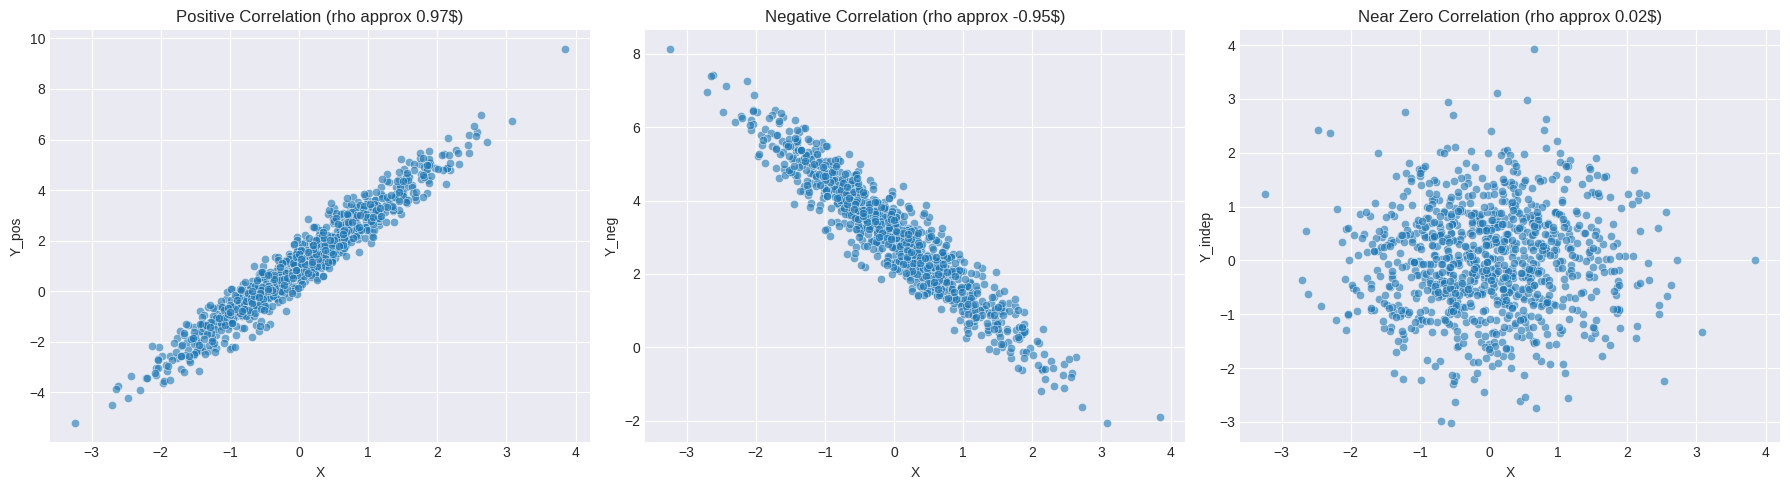

In [3]:
# Calculate correlation coefficients using the same samples
corr_matrix_pos = np.corrcoef(x_samples, y_samples_pos)
corr_matrix_neg = np.corrcoef(x_samples, y_samples_neg)
corr_matrix_indep = np.corrcoef(x_samples, y_samples_indep)

# Extract correlation values
corr_xy_pos = corr_matrix_pos[0, 1]
corr_xy_neg = corr_matrix_neg[0, 1]
corr_xy_indep = corr_matrix_indep[0, 1]

print(f"Correlation Matrix (X, Y_pos):\n{corr_matrix_pos}\n")
print(f"Corr(X, Y_pos): {corr_xy_pos:.4f}")
print(f"Corr(X, Y_neg): {corr_xy_neg:.4f}")
print(f"Corr(X, Y_indep): {corr_xy_indep:.4f}")

# Visualize the relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=False)

sns.scatterplot(x=x_samples, y=y_samples_pos, ax=axes[0], alpha=0.6)
axes[0].set_title(f'Positive Correlation (rho approx {corr_xy_pos:.2f}$)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y_pos')

sns.scatterplot(x=x_samples, y=y_samples_neg, ax=axes[1], alpha=0.6)
axes[1].set_title(f'Negative Correlation (rho approx {corr_xy_neg:.2f}$)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y_neg')

sns.scatterplot(x=x_samples, y=y_samples_indep, ax=axes[2], alpha=0.6)
axes[2].set_title(f'Near Zero Correlation (rho approx {corr_xy_indep:.2f}$)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y_indep')

plt.tight_layout()
plt.show()

The scatter plots visually confirm the relationships indicated by the correlation coefficients. Note how the spread around the potential line affects the magnitude of $\rho$. `Y_pos` has a stronger linear relationship (less noise relative to the slope) than `Y_neg` in our simulation, resulting in $|\rho_{XY_{pos}}| > |\rho_{XY_{neg}}|$. The independent case shows no discernible linear pattern.

#### Example: Correlation between Study Hours and Exam Scores

Let's simulate some data where exam scores depend linearly on study hours, but with some random variation.

Covariance between Study Hours and Exam Score: 29.70
Correlation between Study Hours and Exam Score: 0.85


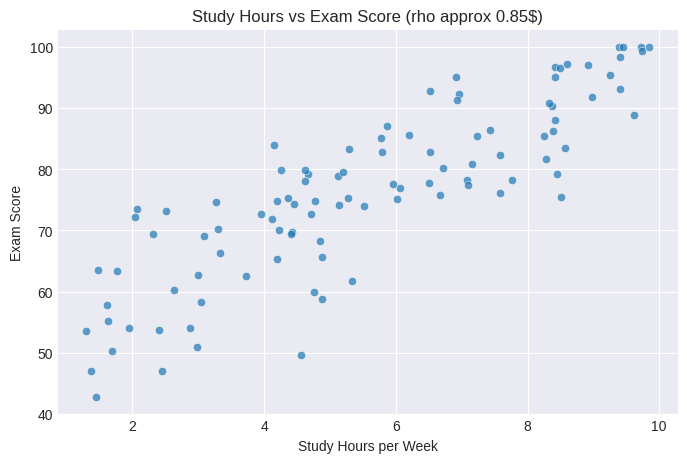

In [4]:
n_students = 100
# Study hours: Uniformly distributed between 1 and 10 hours/week
study_hours = np.random.uniform(1, 10, n_students)
# Exam score: Base score + hours effect + random noise (normal)
base_score = 50
hours_effect = 5 * study_hours
noise = np.random.normal(0, 8, n_students) # Std dev of 8 points
exam_scores = base_score + hours_effect + noise
# Ensure scores are within a reasonable range (e.g., 0-100)
exam_scores = np.clip(exam_scores, 0, 100)

# Calculate Covariance and Correlation
cov_study_score = np.cov(study_hours, exam_scores)[0, 1]
corr_study_score = np.corrcoef(study_hours, exam_scores)[0, 1]

print(f"Covariance between Study Hours and Exam Score: {cov_study_score:.2f}")
print(f"Correlation between Study Hours and Exam Score: {corr_study_score:.2f}")

# Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(x=study_hours, y=exam_scores, alpha=0.7)
plt.title(f'Study Hours vs Exam Score (rho approx {corr_study_score:.2f}$)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

The positive correlation confirms the simulated relationship: students who study more tend to get higher scores. The correlation isn't 1 because of the random noise component (representing other factors like innate ability, test anxiety, luck).

## Variance of Sums of Random Variables

Knowing the covariance or correlation is crucial when calculating the variance of a sum or difference of random variables.

**Theorem:** For any two random variables $X$ and $Y$, and constants $a$ and $b$:

$$ \mathrm{Var}(aX + bY) = a^2 \mathrm{Var}(X) + b^2 \mathrm{Var}(Y) + 2ab \mathrm{Cov}(X, Y) $$

**Proof Sketch:**
$\mathrm{Var}(aX + bY) = E[((aX + bY) - E[aX + bY])^2]$
$= E[(a(X - E[X]) + b(Y - E[Y]))^2]$
$= E[a^2(X - E[X])^2 + b^2(Y - E[Y])^2 + 2ab(X - E[X])(Y - E[Y])]$
Use linearity of expectation:
$= a^2 E[(X - E[X])^2] + b^2 E[(Y - E[Y])^2] + 2ab E[(X - E[X])(Y - E[Y])]$
$= a^2 \mathrm{Var}(X) + b^2 \mathrm{Var}(Y) + 2ab \mathrm{Cov}(X, Y)$

**Special Case: Sum of Variables ($a=1, b=1$)**

$$ \mathrm{Var}(X + Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2 \mathrm{Cov}(X, Y) $$

**Special Case: Difference of Variables ($a=1, b=-1$)**

$$ \mathrm{Var}(X - Y) = \mathrm{Var}(X) + (-1)^2 \mathrm{Var}(Y) + 2(1)(-1) \mathrm{Cov}(X, Y) $$
$$ \mathrm{Var}(X - Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) - 2 \mathrm{Cov}(X, Y) $$

**Crucial Simplification: Independent Variables**

If $X$ and $Y$ are **independent**, then $\mathrm{Cov}(X, Y) = 0$. The formulas simplify significantly:

$$ \mathrm{Var}(aX + bY) = a^2 \mathrm{Var}(X) + b^2 \mathrm{Var}(Y) \quad (\text{if independent}) $$
$$ \mathrm{Var}(X + Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) \quad (\text{if independent}) $$
$$ \mathrm{Var}(X - Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) \quad (\text{if independent}) $$

**Extension to Multiple Variables:**
For $n$ random variables $X_1, X_2, ..., X_n$:

$$ \mathrm{Var}\left(\sum_{i=1}^n a_i X_i\right) = \sum_{i=1}^n a_i^2 \mathrm{Var}(X_i) + \sum_{i \ne j} a_i a_j \mathrm{Cov}(X_i, X_j) $$
$$ \mathrm{Var}\left(\sum_{i=1}^n a_i X_i\right) = \sum_{i=1}^n a_i^2 \mathrm{Var}(X_i) + 2 \sum_{i < j} a_i a_j \mathrm{Cov}(X_i, X_j) $$

If all $X_i$ are independent, then all $\mathrm{Cov}(X_i, X_j) = 0$ for $i \ne j$, and:

$$ \mathrm{Var}\left(\sum_{i=1}^n a_i X_i\right) = \sum_{i=1}^n a_i^2 \mathrm{Var}(X_i) \quad (\text{if independent}) $$

**Example Application: Portfolio Variance**
Imagine a simple portfolio with investment $a$ in Stock A (return $X$) and investment $b$ in Stock B (return $Y$). The total return is $R = aX + bY$. The risk (variance) of the portfolio is:
$\mathrm{Var}(R) = a^2 \mathrm{Var}(X) + b^2 \mathrm{Var}(Y) + 2ab \mathrm{Cov}(X, Y)$.
If the stocks are negatively correlated ($\mathrm{Cov}(X, Y) < 0$), the portfolio variance is *reduced* compared to holding uncorrelated assets. This is the principle of diversification.

### Hands-on: Demonstrating Variance Rules via Simulation

Let's simulate and verify the variance rules.

In [5]:
# Case 1: Independent Variables
n_samples = 100000
X_ind = np.random.normal(loc=5, scale=2, size=n_samples) # Mean=5, Var=4
Y_ind = np.random.normal(loc=10, scale=3, size=n_samples) # Mean=10, Var=9

# Theoretical values
var_X_th = 4
var_Y_th = 9
cov_XY_th_ind = 0 # Because independent
var_sum_th_ind = var_X_th + var_Y_th + 2 * cov_XY_th_ind
var_diff_th_ind = var_X_th + var_Y_th - 2 * cov_XY_th_ind

# Empirical values from simulation
var_X_emp = np.var(X_ind)
var_Y_emp = np.var(Y_ind)
cov_XY_emp_ind = np.cov(X_ind, Y_ind)[0, 1]
var_sum_emp_ind = np.var(X_ind + Y_ind)
var_diff_emp_ind = np.var(X_ind - Y_ind)

print("--- Independent Case ---")
print(f"Theoretical Var(X): {var_X_th:.4f}, Empirical Var(X): {var_X_emp:.4f}")
print(f"Theoretical Var(Y): {var_Y_th:.4f}, Empirical Var(Y): {var_Y_emp:.4f}")
print(f"Theoretical Cov(X, Y): {cov_XY_th_ind:.4f}, Empirical Cov(X, Y): {cov_XY_emp_ind:.4f}")
print(f"Theoretical Var(X+Y): {var_sum_th_ind:.4f}, Empirical Var(X+Y): {var_sum_emp_ind:.4f}")
print(f"Check: Var(X)+Var(Y) = {var_X_emp + var_Y_emp:.4f}")
print(f"Theoretical Var(X-Y): {var_diff_th_ind:.4f}, Empirical Var(X-Y): {var_diff_emp_ind:.4f}")
print(f"Check: Var(X)+Var(Y) = {var_X_emp + var_Y_emp:.4f}") # Should match Var(X-Y) for independent


# Case 2: Dependent Variables (Positively Correlated)
# Create Y based on X to induce correlation
Z = np.random.normal(loc=0, scale=1.5, size=n_samples) # Noise
Y_dep = 0.5 * X_ind + Z + 5 # Y depends on X

# Calculate empirical covariance and theoretical variance for Y_dep
cov_XY_emp_dep = np.cov(X_ind, Y_dep)[0, 1]
var_Y_emp_dep = np.var(Y_dep)
# Theoretical Var(Y_dep) = Var(0.5*X_ind + Z + 5) = Var(0.5*X_ind + Z) assuming X_ind and Z are independent
# = (0.5)^2 * Var(X_ind) + Var(Z) = 0.25 * 4 + (1.5)^2 = 1 + 2.25 = 3.25
var_Y_th_dep = 3.25
# Theoretical Cov(X, Y_dep) = Cov(X_ind, 0.5*X_ind + Z + 5)
# = Cov(X_ind, 0.5*X_ind) + Cov(X_ind, Z) + Cov(X_ind, 5)
# = 0.5 * Cov(X_ind, X_ind) + 0 + 0 = 0.5 * Var(X_ind) = 0.5 * 4 = 2
cov_XY_th_dep = 2

# Theoretical values for sums/differences
var_sum_th_dep = var_X_th + var_Y_th_dep + 2 * cov_XY_th_dep
var_diff_th_dep = var_X_th + var_Y_th_dep - 2 * cov_XY_th_dep

# Empirical values for sums/differences
var_sum_emp_dep = np.var(X_ind + Y_dep)
var_diff_emp_dep = np.var(X_ind - Y_dep)

print("\n--- Dependent Case (Positive Correlation) ---")
print(f"Empirical Var(X): {var_X_emp:.4f}") # Same X as before
print(f"Theoretical Var(Y_dep): {var_Y_th_dep:.4f}, Empirical Var(Y_dep): {var_Y_emp_dep:.4f}")
print(f"Theoretical Cov(X, Y_dep): {cov_XY_th_dep:.4f}, Empirical Cov(X, Y_dep): {cov_XY_emp_dep:.4f}")
print(f"Theoretical Var(X+Y_dep): {var_sum_th_dep:.4f}, Empirical Var(X+Y_dep): {var_sum_emp_dep:.4f}")
print(f"Check: Var(X)+Var(Y)+2Cov(X,Y) = {var_X_emp + var_Y_emp_dep + 2*cov_XY_emp_dep:.4f}")
print(f"Theoretical Var(X-Y_dep): {var_diff_th_dep:.4f}, Empirical Var(X-Y_dep): {var_diff_emp_dep:.4f}")
print(f"Check: Var(X)+Var(Y)-2Cov(X,Y) = {var_X_emp + var_Y_emp_dep - 2*cov_XY_emp_dep:.4f}")

--- Independent Case ---
Theoretical Var(X): 4.0000, Empirical Var(X): 4.0113
Theoretical Var(Y): 9.0000, Empirical Var(Y): 8.9801
Theoretical Cov(X, Y): 0.0000, Empirical Cov(X, Y): 0.0392
Theoretical Var(X+Y): 13.0000, Empirical Var(X+Y): 13.0699
Check: Var(X)+Var(Y) = 12.9915
Theoretical Var(X-Y): 13.0000, Empirical Var(X-Y): 12.9131
Check: Var(X)+Var(Y) = 12.9915

--- Dependent Case (Positive Correlation) ---
Empirical Var(X): 4.0113
Theoretical Var(Y_dep): 3.2500, Empirical Var(Y_dep): 3.2587
Theoretical Cov(X, Y_dep): 2.0000, Empirical Cov(X, Y_dep): 2.0126
Theoretical Var(X+Y_dep): 11.2500, Empirical Var(X+Y_dep): 11.2953
Check: Var(X)+Var(Y)+2Cov(X,Y) = 11.2953
Theoretical Var(X-Y_dep): 3.2500, Empirical Var(X-Y_dep): 3.2448
Check: Var(X)+Var(Y)-2Cov(X,Y) = 3.2447


The simulation results closely match the theoretical calculations based on the variance formulas, both for independent and dependent variables. Notice how the positive covariance in the dependent case *increases* the variance of the sum and *decreases* the variance of the difference compared to the independent case.

## Summary

This chapter introduced key concepts for understanding the relationships between random variables:

* **Independence:** Variables are independent if knowing the value of one provides no information about the other. Mathematically, their joint distribution function factorizes into the product of their marginals.
* **Covariance:** Measures the direction of the *linear* relationship ($E[XY] - E[X]E[Y]$). Positive covariance indicates variables tend to move together; negative indicates they move oppositely; zero indicates no linear association. Its magnitude depends on the variables' units.
* **Correlation Coefficient ($\rho$):** A standardized measure ($\frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}$) of the strength and direction of the *linear* relationship, ranging from -1 (perfect negative linear) to +1 (perfect positive linear). $\rho=0$ means no linear relationship, but not necessarily independence.
* **Variance of Sums:** The variance of a sum (or weighted sum) depends on the individual variances *and* the covariance between the variables: $\mathrm{Var}(X + Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2 \mathrm{Cov}(X, Y)$. If the variables are independent, $\mathrm{Cov}(X,Y)=0$, simplifying the formula.

We saw how to calculate covariance and correlation using NumPy and Pandas, visualize relationships using scatter plots, and verify the variance rules through simulation. These concepts are fundamental for multivariate statistics, machine learning (feature selection/engineering), finance (portfolio theory), and many other fields where understanding variable interactions is crucial.

## Exercises

1.  **Conceptual:** Give an example of two variables that you expect to be:
    a) Positively correlated.
    b) Negatively correlated.
    c) Uncorrelated but dependent.
    d) Independent.
    Justify your reasoning.

2.  **Calculation:** Let $X$ have $E[X]=2, \mathrm{Var}(X)=9$. Let $Y$ have $E[Y]=-1, \mathrm{Var}(Y)=4$. Let $\mathrm{Cov}(X, Y) = -3$. Calculate:
    a) $E[3X - 2Y + 5]$
    b) $\mathrm{Var}(X + Y)$
    c) $\mathrm{Var}(X - Y)$
    d) $\mathrm{Var}(3X - 2Y + 5)$
    e) $\rho(X, Y)$

3.  **Simulation (Correlation):**
    a) Generate 500 samples of $X \sim \text{Normal}(0, 1)$.
    b) Generate 500 samples of $Y = -2X + \epsilon$, where $\epsilon \sim \text{Normal}(0, \sigma^2)$ is noise. Try $\sigma = 0.5$ and $\sigma = 2$.
    c) For each value of $\sigma$, create a scatter plot of $X$ vs $Y$ and calculate the sample correlation coefficient $\rho(X, Y)$.
    d) How does the noise level $\sigma$ affect the correlation coefficient? Explain why.

4.  **Simulation (Variance of Sums):**
    a) Let $X \sim \text{Poisson}(\lambda=3)$ and $Y \sim \text{Poisson}(\lambda=5)$. Assume $X$ and $Y$ are independent.
    b) Generate 10,000 samples for $X$ and $Y$.
    c) Calculate the empirical variance of $X$, $Y$, and $X+Y$.
    d) The theoretical variance of a Poisson($\lambda$) distribution is $\lambda$. Compare the empirical $\mathrm{Var}(X+Y)$ to the theoretical prediction $\mathrm{Var}(X) + \mathrm{Var}(Y)$ (since they are independent). Are they close?
    e) It's a known property that the sum of independent Poisson variables is also Poisson, so $X+Y \sim \text{Poisson}(\lambda_X + \lambda_Y)$. What is the theoretical variance of $X+Y$ based on this property? Does it match your findings?

5.  **Pandas Correlation:** Load a dataset (e.g., the `tips` dataset from Seaborn: `tips = sns.load_dataset('tips')`). Calculate the correlation matrix for the numerical columns (e.g., `total_bill`, `tip`, `size`). Interpret the correlation between `total_bill` and `tip`. Visualize this relationship with a scatter plot.

In [6]:
# Example code for Exercise 5 setup
# import seaborn as sns
# import pandas as pd
# tips = sns.load_dataset('tips')
# print(tips.head())
# numerical_tips = tips[['total_bill', 'tip', 'size']]
# correlation_matrix = numerical_tips.corr()
# print("\nCorrelation Matrix:")
# print(correlation_matrix)
# sns.scatterplot(data=tips, x='total_bill', y='tip')
# plt.title('Total Bill vs Tip Amount')
# plt.show()